## 貝氏分類器

### 優點
1. **簡單且有效**：貝氏分類器基於概率模型，算法本身比較簡單，對於基礎分類任務來說非常有效。
2. **需要的訓練數據較少**：相較於其他複雜的算法，貝氏分類器在有限的數據下仍然可以進行有效的訓練和預測。
3. **對於小數據集表現好**：在數據集較小的情況下，它能夠比其他算法更好地進行預測，因為它利用了概率分布。
4. **處理缺失數據**：貝氏分類器可以較好地處理缺失數據問題。
5. **更新模型容易**：隨著新數據的到來，可以簡單地更新概率，適應新的數據情況。

### 缺點

1. **特徵獨立性假設**：貝氏分類器假設所有特徵都是相互獨立的，但在實際應用中，特徵之間往往是有關聯的。這可能會影響分類的準確性。
2. **性能問題**：對於包含很多連續數據或特徵間相關性強的數據集，貝氏分類器的性能可能不如其他更複雜的模型。
3. **過於簡化實際問題**：貝氏分類器有時會因為其簡化的數學模型而無法捕捉到數據中更複雜的關係。
4. **多類別分類問題**：在多類別分類問題上，貝氏分類器可能需要更複雜的實現，特別是在處理大量類別時。

貝氏分類器在處理某些類型的問題時非常高效，尤其是在文本分類和垃圾郵件識別等領域。然而，對於需要捕捉複雜特徵關係的任務，可能需要考慮使用更適合的算法。

- [延伸閱讀](https://pyecontech.com/2020/02/27/bayesian_classifier/)
- [貝氏定理影片](https://www.youtube.com/watch?v=9wCnvr7Xw4E&pp=ygUfbmFpdmUgYmF5ZXMgcmVncmVzc29yIHN0YXRxdWVzdA%3D%3D)
- [簡單貝氏影片](https://www.youtube.com/watch?v=O2L2Uv9pdDA)
- [高斯貝氏影片](https://www.youtube.com/watch?v=H3EjCKtlVog)

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# 加載資料集
data = load_iris()
X = data.data
y = data.target

# 切分訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 初始化 Gaussian Naive Bayes 分類器
model = GaussianNB()

# 訓練模型
model.fit(X_train, y_train)

# 預測測試集
predictions = model.predict(X_test)

# 計算準確率
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.98


In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error
import numpy as np

# 生成合成數據集
X, y, coefficients = make_regression(n_samples=1000, n_features=20, noise=0.1, coef=True, random_state=42)

# 切分訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化 BayesianRidge 回歸模型
model = BayesianRidge()

# 訓練模型
model.fit(X_train, y_train)

# 預測測試集
predictions = model.predict(X_test)

# 計算均方誤差
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse:.2f}')

## SVM
支持向量機（Support Vector Machine, SVM）是一種廣泛使用的監督學習模型，特別適用於分類和回歸任務。它的主要目標是在數據點之間找到一個最優的超平面（決策邊界），以此來區分不同的類別。

1. 最大邊際分類器：

SVM 試圖最大化不同類別之間的邊際，即最近的數據點（suport vector）與決策邊界之間的距離。這種方法使模型在未知數據上具有更好的泛化能力。

2. 核技巧：

SVM可以通過所謂的「kernal trick」來處理非線性可分數據。核函數可以將數據映射到更高維的空間，使得在這個新空間中數據變得線性可分。常見的核函數包括多項式核、高斯核（RBF），和線性核等。

3. 軟邊際和正則化：

為了處理數據中的噪聲和異常值，SVM引入了soft-margin概念，允許某些數據點違反最大邊際原則。這是通過引入懲罰參數（C參數），來平衡邊際的寬度和誤分類率。
- [延伸閱讀](https://medium.com/jameslearningnote/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC3-4%E8%AC%9B-%E6%94%AF%E6%8F%B4%E5%90%91%E9%87%8F%E6%A9%9F-support-vector-machine-%E4%BB%8B%E7%B4%B9-9c6c6925856b)
- [相關文章](https://ithelp.ithome.com.tw/m/articles/10270447)

In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm

# 載入 iris 資料集
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 分割資料為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 特徵標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 建立 LinearSVC 模型
linearSvcModel = svm.LinearSVC(C=1, max_iter=10000)

# 使用訓練資料訓練模型
linearSvcModel.fit(X_train_scaled, y_train)

# 使用測試資料預測分類
predicted = linearSvcModel.predict(X_test_scaled)

# 計算訓練集和測試集的準確率
train_accuracy = linearSvcModel.score(X_train_scaled, y_train)
test_accuracy = linearSvcModel.score(X_test_scaled, y_test)

print("訓練集準確率:", train_accuracy)
print("測試集準確率:", test_accuracy)


訓練集準確率: 0.9428571428571428
測試集準確率: 0.9555555555555556


/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [6]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm

# 載入 iris 資料集
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 分割資料為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 特徵標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 建立使用線性核的 SVC 模型
svcModel = svm.SVC(kernel='linear', C=1)

# 使用訓練資料訓練模型
svcModel.fit(X_train_scaled, y_train)

# 使用測試資料預測分類
predicted = svcModel.predict(X_test_scaled)

# 計算訓練集和測試集的準確率
train_accuracy = svcModel.score(X_train_scaled, y_train)
test_accuracy = svcModel.score(X_test_scaled, y_test)

print("訓練集準確率:", train_accuracy)
print("測試集準確率:", test_accuracy)

訓練集準確率: 0.9714285714285714
測試集準確率: 0.9777777777777777


## 超參數

### 1. C：正則化參數
- **作用**：`C` 參數控制了誤分類的懲罰力度。較大的 `C` 值意味著模型會盡可能減少訓練集的錯誤分類，但可能導致過擬合。較小的 `C` 值使模型更能容忍錯誤分類，增加模型的泛化能力，但可能導致欠擬合。
- **調整方法**：通常通過交叉驗證來找到最佳的 `C` 值。選擇一個範圍，例如 `0.01` 到 `100`，通過試驗不同的值來觀察模型性能的變化。
- [C 與 SVC 的損失函數](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_scale_c.html#sphx-glr-auto-examples-svm-plot-svm-scale-c-py)
### 2. kernel：核函數
- **作用**：決定數據在新特徵空間中的映射方式。常見的核包括 `linear`（線性核）、`poly`（多項式核）、`rbf`（高斯徑向基函數核）和 `sigmoid`。
- **選擇依據**：
  - **線性核**：當數據線性可分時使用。
  - **多項式核**：適用於數據集的特徵之間有更複雜的交互。
  - **RBF核**：當數據集高度非線性時使用，能自動處理特徵到高維空間的映射。
  - **Sigmoid核**：較少使用，可用於神經網絡的模擬。
- **調整方法**：核的選擇通常基於數據集的特性，可透過實驗確定最適核類型。

### 3. gamma：核函數的參數（對於非線性核）
- **作用**：只對 `poly` 和 `rbf` 等非線性核有影響，控制單個訓練樣本的影響範圍。高 `gamma` 值導致影響範圍小，可能造成過擬合；低 `gamma` 值導致影響範圍大，可能導致欠擬合。
- **調整方法**：與 `C` 一樣，通過交叉驗證來選擇最佳的 `gamma` 值，範圍可以從很小的數值如 `0.001` 到比較大的數值如 `10`。

### 4. degree：多項式核的度數（poly kernel）
- **作用**：控制多項式核的最高次方。度數越高，模型能夠學習數據的高度非線性關係，但過高可能導致過擬合。
- **調整方法**：適用於多項式核，一般從低次如 `2` 或 `3` 開始嘗試，逐漸增加，觀察模型表現。


In [10]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm

# 載入 iris 資料集
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 分割資料為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 特徵標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 建立使用多項式核的 SVC 模型
polyModel = svm.SVC(kernel='poly', degree=3, gamma='auto', C=1)

# 使用訓練資料訓練模型
polyModel.fit(X_train_scaled, y_train)

# 使用測試資料預測分類
predicted = polyModel.predict(X_test_scaled)

# 計算訓練集和測試集的準確率
train_accuracy = polyModel.score(X_train_scaled, y_train)
test_accuracy = polyModel.score(X_test_scaled, y_test)

print("訓練集準確率:", train_accuracy)
print("測試集準確率:", test_accuracy)


訓練集準確率: 0.9047619047619048
測試集準確率: 0.9555555555555556


In [7]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm

# 載入 iris 資料集
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 分割資料為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 特徵標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 建立使用 RBF 核的 SVC 模型
rbfModel = svm.SVC(kernel='rbf', gamma=0.7, C=1)

# 使用訓練資料訓練模型
rbfModel.fit(X_train_scaled, y_train)

# 使用測試資料預測分類
predicted = rbfModel.predict(X_test_scaled)

# 計算訓練集和測試集的準確率
train_accuracy = rbfModel.score(X_train_scaled, y_train)
test_accuracy = rbfModel.score(X_test_scaled, y_test)

print("訓練集準確率:", train_accuracy)
print("測試集準確率:", test_accuracy)

訓練集準確率: 0.9619047619047619
測試集準確率: 1.0


## SVR
支持向量機（SVM）不僅可以用於分類問題，也可以用於回歸任務，稱為支持向量回歸（Support Vector Regression, SVR）。在SVR中，目標是找到一條能夠最大程度地適合數據但在一定誤差範圍內（稱為 epsilon）的模型，並且使模型的複雜度最小化，從而增加模型的泛化能力。

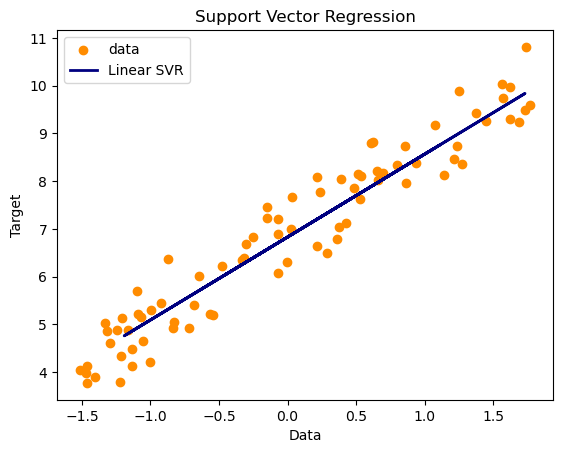

In [15]:
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 生成數據
np.random.seed(0)
X = 2 * np.random.rand(100, 1)  # 隨機生成100個數據點
y = 4 + 3 * X[:, 0] + np.random.randn(100) * 0.5  # y = 4 + 3x + 高斯噪聲

# 分割數據為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 特徵標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 建立 SVR 模型
svr_linear = SVR(kernel='linear', C=1.0, epsilon=0.2)

# 訓練模型
svr_linear.fit(X_train_scaled, y_train)

# 預測
y_pred = svr_linear.predict(X_test_scaled)

# 繪製結果
plt.scatter(X_train_scaled, y_train, color='darkorange', label='data')
plt.plot(X_test_scaled, y_pred, color='navy', lw=2, label='Linear SVR')
plt.xlabel('Data')
plt.ylabel('Target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()
